In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from math import isnan
%matplotlib inline

In [3]:
def all_values_equal(table, column, check_nan=True, value = None):
    """
    по умолчанию проверяет во всех ли таблицах данная колонка Nan;
    
    
    если check_nan = False, проверяет, в каждой ли таблице одинаковое значение 
    в данной колонке, но необязательно одно для всех таблиц;
    
    
    если  задан value, проверяет во всех ли таблицах в этой колонке именно такое значение;
    
                   
    возвращает название колонки, результат функции и название курса, где первый раз было невыполнено условие


    """
    if check_nan and value is not None:
        raise Exception('Поставьте check_nan=False или уберите значение value')
        
    subjects = ['math','physics','linguo']
    coursers = [['293','294','295'], ['345','346'],['267','268']]
    for s in enumerate(subjects):
        for c in coursers[s[0]]:
            path = f'courses_with_manual_check/{s[1]}/{c}/'
            df =pd.read_csv(path+f'{table}.csv')
            if check_nan:
                if df[column].isna().sum() != df.shape[0]:
                    return column,False, f'{s[1]}-{c}'         
            else:
                try:
                    if len(df[column].value_counts().values) != 1:
                        if value is not None:
                            if df[column].value_counts().values[0]!=value:
                                return column, False, f'{s[1]}-{c}'
                except: 
                    raise Exception(f'Нет такого столбца в {s[1]}-{c}')
        
    return column, True
    


In [4]:
print(all_values_equal('course_element', 'element_type', check_nan=False))
print(all_values_equal('course_element', 'is_advanced', check_nan=False, value=False)) # во всех таблицах False
print(all_values_equal('course_element', 'score', check_nan=False)) #равны между собой внутри каждой таблицы
print(all_values_equal('course_element', 'max_tries'))


print(all_values_equal('user_course_progress', 'advanced_modules_done', check_nan=False, value=0))


print(all_values_equal('user_module_progress', 'progress_failed', check_nan=False, value=0))
print(all_values_equal('user_module_progress', 'time_closed'))
print(all_values_equal('user_module_progress', 'time_done'))


print(all_values_equal('user_element_progress', 'time_started'))
print(all_values_equal('user_element_progress', 'course_element_type', check_nan=False, value='task'))
print(all_values_equal('user_element_progress', 'hints_used', check_nan=False, value=0))



('element_type', True)
('is_advanced', True)
('score', True)
('max_tries', True)
('advanced_modules_done', False, 'math-295')
('progress_failed', True)
('time_closed', False, 'physics-345')
('time_done', False, 'physics-345')
('time_started', True)
('course_element_type', True)
('hints_used', False, 'linguo-267')


Всюду __NaN__:
\
__course_element__: `max_tries`  
__user_element_progress__:`time_started`

Неинформативные поля(возможно):
\
__course_element__: `open_date`(хотя по нему не уверен, может и полезно), `close_date`, `element_type`, `score`(равны между собой внутри каждой таблицы), `is_advanced`\
**user_course_progress** : `time_created`,`time_updated`\
**user_module_progress** : `progress_failed`, `time_achieve`(кажется можно выкинуть, так как есть поле `is_achieved`), `tasks_done` дублирует `steps_done`, т.к. в нашем случае все `steps` &mdash; это `tasks`\
__user_element_progress__ :`course_element_type`, `time_achieve`(кажется можно выкинуть, так как есть поле `is_achieved`)

In [5]:
path = 'courses_with_manual_check/math/293/'
course_element = pd.read_csv(path+'course_element.csv')
course_element = course_element.drop(columns=['max_tries']).dropna()
course_element = course_element.drop(columns = ['close_date','element_type','score','is_advanced'])
course_element.head().append(course_element.tail())

,id,module_id,element_id,position,open_date
0,4333709,3454,2493,18,2021-03-23 21:00:00
1,4151007,3454,2526,11,2021-03-09 21:00:00
2,4022486,3454,2633,8,2021-03-01 08:00:00
3,5078158,3454,2637,44,2021-05-31 08:00:00
4,4722327,3454,2699,31,2021-04-28 08:00:00
39,4333729,3454,11393,20,2021-03-27 10:00:00
40,4722352,3454,11456,30,2021-04-24 08:00:00
41,4022438,3454,11609,6,2021-02-25 21:00:00
42,4722354,3454,11973,28,2021-04-19 21:00:00
43,4722355,3454,13054,27,2021-04-19 21:00:00


In [6]:
user_course_progress = pd.read_csv(path+'user_course_progress.csv').drop(columns=['time_created','time_updated'])
user_course_progress

,id,user_id,course_id,modules_achieved,advanced_modules_done,modules_closed,modules_done
0,251326,100120070111035903,293,22,0,22,22
1,251178,100119810110737205,293,20,0,19,19
2,251331,100120070111193822,293,21,0,10,10
3,251196,100120070111166725,293,22,0,22,22
4,251218,100120070111579569,293,13,0,13,13
...,...,...,...,...,...,...,...
109,305708,100120080111143974,293,17,0,17,17
110,303078,100120070111045630,293,0,0,0,0
111,303091,100120070110738313,293,2,0,0,2
112,299339,100120070111131771,293,0,0,0,0


`user_module_progress` нас кажется не интересует, как таргет

>Модуль с ручной проверкой отличается от обычного тем, что __все задачи в нём требуют ручной проверки__ преподавателя.
  
  
>`steps_done` —число элементов с __автоматической__ проверкой в модуле, по которым получено максимальное число баллов  

Почему `steps_done` в таблице не ноль? Ладно


In [7]:
user_module_progress = pd.read_csv(path+'user_module_progress.csv').drop(columns=['progress_failed', 'tasks_done'])
user_module_progress['achieve_reason'] = user_module_progress['achieve_reason'].fillna("haven't achieved")
user_module_progress['is_achieved'] = user_module_progress['is_achieved'].fillna(False).astype(int)

user_module_progress['is_closed'] = user_module_progress['is_closed'].astype(int)
user_module_progress['is_done'] = user_module_progress['is_done'].astype(int)



user_module_progress

,id,user_id,course_id,course_module_id,progress_current,steps_done,is_achieved,is_closed,course_progress_id,time_created,time_updated,time_closed,time_achieved,time_unlocked,time_done,is_done,achieve_reason
0,4258599,100120070111171973,293,3454,130.0,10,0,0,295079,2021-03-10 18:45:33.221355,2021-06-13 05:25:06.712449,NaN,NaN,2021-03-10 18:45:33.221355,NaN,0,haven't achieved
1,4091857,100120070111412531,293,3454,104.0,13,0,0,251197,2021-02-15 15:16:33.467243,2021-05-12 10:46:54.123536,NaN,NaN,2021-02-15 15:16:33.467243,NaN,0,haven't achieved
2,4288362,100120070110510698,293,3454,0.0,0,0,0,297852,2021-03-15 07:53:33.152413,NaN,NaN,NaN,2021-03-15 07:53:33.152413,NaN,0,haven't achieved
3,4091867,100120100111069319,293,3454,218.0,30,1,0,251184,2021-02-15 15:16:33.467243,2021-05-27 14:20:00.909789,NaN,2021-05-27 14:20:00.909789,2021-02-15 15:16:33.467243,NaN,0,solved
4,4336135,100120070111077654,293,3454,0.0,0,0,0,302793,2021-03-21 11:51:56.202819,NaN,NaN,NaN,2021-03-21 11:51:56.202819,NaN,0,haven't achieved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,4257953,100120070111448503,293,3454,0.0,0,0,0,295007,2021-03-10 17:11:52.784012,NaN,NaN,NaN,2021-03-10 17:11:52.784012,NaN,0,haven't achieved
110,4353698,100120080110746673,293,3454,0.0,0,0,0,304476,2021-03-25 09:41:19.007677,NaN,NaN,NaN,2021-03-25 09:41:19.007677,NaN,0,haven't achieved
111,4091834,100120070110754993,293,3454,228.0,31,1,0,251449,2021-02-15 15:16:33.467243,2021-06-12 09:25:59.109609,NaN,2021-06-12 09:25:16.790533,2021-02-15 15:16:33.467243,NaN,0,solved
112,4256581,100120070111532948,293,3454,259.0,35,1,0,294867,2021-03-10 14:18:56.222065,2021-06-05 11:37:37.909807,NaN,2021-05-25 18:35:27.815664,2021-03-10 14:18:56.222065,NaN,0,solved


In [8]:
user_module_progress.isna().sum()/user_module_progress.shape[0]

id                    0.000000
user_id               0.000000
course_id             0.000000
course_module_id      0.000000
progress_current      0.000000
steps_done            0.000000
is_achieved           0.000000
is_closed             0.000000
course_progress_id    0.000000
time_created          0.000000
time_updated          0.543860
time_closed           1.000000
time_achieved         0.885965
time_unlocked         0.000000
time_done             1.000000
is_done               0.000000
achieve_reason        0.000000
dtype: float64

In [9]:
user_element_progress = pd.read_csv(path+'user_element_progress.csv').drop(columns=['course_element_type','time_started'])
user_element_progress['achieve_reason'] = user_element_progress['achieve_reason'].fillna("haven't achieved")
user_element_progress['is_achieved'] = user_element_progress['is_achieved'].fillna(False).astype(int)
user_element_progress

,id,user_id,course_id,course_module_id,course_element_id,progress_current,is_achieved,hints_used,tries_count,module_progress_id,time_created,time_updated,time_closed,time_achieved,achieve_reason
0,96461094,100120070111566368,293,3454,3892,7.0,1,0,1,4091856,2021-05-21 10:16:20.707856,2021-06-11 07:33:25.957219,2021-06-11 07:33:25.959167,2021-06-11 07:33:25.959167,solved
1,96461097,100120080111377852,293,3454,2637,7.0,1,0,1,4091852,2021-05-21 10:16:20.707856,2021-06-11 07:30:33.504585,2021-06-11 07:30:33.506627,2021-06-11 07:30:33.506627,solved
2,96461175,100120090110736982,293,3454,2637,7.0,1,0,1,4091854,2021-05-21 10:16:21.607894,2021-06-11 07:30:07.341239,2021-06-11 07:30:07.343554,2021-06-11 07:30:07.343554,solved
3,96461178,100120090110736982,293,3454,3892,7.0,1,0,1,4091854,2021-05-21 10:16:21.607894,2021-06-11 07:29:41.535418,2021-06-11 07:29:41.537406,2021-06-11 07:29:41.537406,solved
4,96461112,100120070110754993,293,3454,3892,7.0,1,0,1,4091834,2021-05-21 10:16:21.126957,2021-06-10 07:42:26.286960,2021-06-10 07:42:26.294751,2021-06-10 07:42:26.294751,solved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,79509062,100120080111565481,293,3454,4249,7.0,1,0,1,4091843,2021-02-15 15:16:33.467243,2021-02-20 20:35:11.210408,2021-02-20 20:35:11.207655,2021-02-20 20:35:11.207655,solved
5012,79508935,100120070111416092,293,3454,4251,7.0,1,0,1,4091811,2021-02-15 15:16:33.467243,2021-02-19 17:38:56.012436,2021-02-19 17:38:56.013306,2021-02-19 17:38:56.013306,solved
5013,79509064,100120070111166725,293,3454,4150,7.0,1,0,3,4091844,2021-02-15 15:16:33.467243,2021-02-18 18:33:30.509323,2021-02-18 18:33:30.510777,2021-02-18 18:33:30.510777,solved
5014,79508957,100120080110738241,293,3454,5059,7.0,1,0,1,4091817,2021-02-15 15:16:33.467243,2021-02-17 19:11:21.166433,2021-02-17 19:11:21.170167,2021-02-17 19:11:21.170167,solved


In [10]:
user_element_progress[['progress_current','hints_used','tries_count','is_achieved']].describe()

,progress_current,hints_used,tries_count,is_achieved
count,5016.000000,5016.0,5016.000000,5016.000000
mean,1.239234,0.0,0.354864,0.156898
std,2.593916,0.0,0.837118,0.363741
min,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000
75%,0.000000,0.0,0.000000,0.000000
max,7.000000,0.0,7.000000,1.000000


## Рандомные ответы детей 

In [11]:
for i in range(5):
    rpath = f'courses_with_manual_check/math/29{3+np.random.randint(0,2)}/'
    solution_log = pd.read_csv(rpath+'solution_log.csv')
    text = json.loads(solution_log['users_answer'].values[np.random.randint(0,solution_log.shape[0])])['solution']['message']
    while(text==""):
        text = json.loads(solution_log['users_answer'].values[np.random.randint(0,solution_log.shape[0])])['solution']['message']
    print(text)
    print('-'*115)


Тут по теореме Менелая все получится, но я еще не умею ее доказывать.
-------------------------------------------------------------------------------------------------------------------
Противоречие в первой строке то что НОД больше 1, во второй - четвёртой получалось что нечётное число = чётному и наоборот.
-------------------------------------------------------------------------------------------------------------------
Представим выражение n+19 в виде x², выражение n+96 в виде y²
Cоставим уравнение:
х²-у²=N+19-(N+96)
х²-у²=N+19-N-96
х²-у²=-77
(х-у)*(х+у)=-77
х-у=-1
х+у=77
Представим выражение n+19 в виде x, выражение n+96 в виде y
Cоставим уравнение:
х-у=N+19-(N+96)
х-у=N+19-N-96
х-у=-77
х²-у²=-77²
х²-у²=5929
(х-у)*(х+у)=5929
х-у=-77
-77(х+у)=5929
х+у=5929/-77
х+у=-77
х=39, а у=38
х²=39²
x²=1521
у²=57²
y²=1444
N=1444+96=1540
N=1521+19=1540
Ответ:N=1540

-------------------------------------------------------------------------------------------------------------------
Ну, лучшее опис

__Файл solution_log.csv__

__Возмножно, неинформативные колонки:__ id, score, review_status (значение not_reviewed соответствует значению not_ready колонки verdict), review_user_id, содержимое ответа ученика и комментарий преподавателя заменяется на размер текста в символах, также колонки со временем удобнее будет заменить на время ответа (возможно, в часах), нужно сохранить время за которое был получен __последний ответ__

In [12]:
solution_log = pd.read_csv(rpath+'solution_log.csv')
solution_log['size_of_answer'] = solution_log['users_answer'].apply(lambda x: len(str(x)))
solution_log['size_of_review'] = solution_log['review'].apply(lambda x: len(str(x)))
solution_log = solution_log.drop(columns=['users_answer', 'review_user_id', 'review', 'id', 'score', 'review_status'])


In [13]:
import datetime
from datetime import datetime
def magic(date):
    date = date[:4]+' '+date[5:7]+' '+date[8:]       
    return date[:18]
difference = []
indexes = []
for i in range(len(solution_log['review_time'])):
    if solution_log['verdict'][i] != 'not_ready':
        a = datetime.strptime(magic(solution_log['submission_time'][i]), '%Y %m %d %H:%M:%S')
        b = datetime.strptime(magic(solution_log['review_time'][i]), '%Y %m %d %H:%M:%S')
        difference.append(b - a)
    else:
        indexes.append(i)
solution_log = solution_log.drop(solution_log.index[indexes]) #удаляем строки с непроверенными попытками
solution_log['time_of_expectation'] = difference
solution_log = solution_log.drop(columns=['submission_time'])

In [14]:
solution_log

,tries_count,hints_used,element_progress_id,verdict,review_time,size_of_answer,size_of_review,time_of_expectation
0,2,0,84474415,partly,2021-04-07 18:07:53.814814,90,1417,1 days 09:56:05
1,1,0,84474415,partly,2021-04-01 18:02:02.103366,319,956,0 days 21:00:00
2,3,0,84474445,ok,2021-04-07 18:54:02.518566,3138,34,1 days 02:10:00
3,2,0,84474445,partly,2021-04-06 03:42:50.611336,175,1247,0 days 20:20:03
4,1,0,84474445,wrong,2021-03-24 18:33:32.922915,753,843,0 days 02:03:58
...,...,...,...,...,...,...,...,...
1775,1,0,87517902,ok,2021-05-05 20:20:27.819277,90,34,0 days 23:38:01
1776,1,0,87517860,ok,2021-04-23 06:18:59.719460,90,34,0 days 14:03:00
1777,2,0,87518022,ok,2021-04-23 06:16:53.214509,90,34,0 days 18:13:05
1778,1,0,87518022,wrong,2021-04-22 09:46:52.771541,1373,397,0 days 13:11:05


In [15]:
one_hot = {'partly':0,'wrong':0,'ok':1}
solution_log['verdict']=solution_log['verdict'].map(one_hot).astype(int)
solution_log['hours_diff']=solution_log['time_of_expectation'].apply(lambda x: x.days*24+x.seconds//3600)
solution_log

,tries_count,hints_used,element_progress_id,verdict,review_time,size_of_answer,size_of_review,time_of_expectation,hours_diff
0,2,0,84474415,0,2021-04-07 18:07:53.814814,90,1417,1 days 09:56:05,33
1,1,0,84474415,0,2021-04-01 18:02:02.103366,319,956,0 days 21:00:00,21
2,3,0,84474445,1,2021-04-07 18:54:02.518566,3138,34,1 days 02:10:00,26
3,2,0,84474445,0,2021-04-06 03:42:50.611336,175,1247,0 days 20:20:03,20
4,1,0,84474445,0,2021-03-24 18:33:32.922915,753,843,0 days 02:03:58,2
...,...,...,...,...,...,...,...,...,...
1775,1,0,87517902,1,2021-05-05 20:20:27.819277,90,34,0 days 23:38:01,23
1776,1,0,87517860,1,2021-04-23 06:18:59.719460,90,34,0 days 14:03:00,14
1777,2,0,87518022,1,2021-04-23 06:16:53.214509,90,34,0 days 18:13:05,18
1778,1,0,87518022,0,2021-04-22 09:46:52.771541,1373,397,0 days 13:11:05,13


__Некоторые характеристики__

Для каждого ученика, проходящего курс, составим вектор из следующих характеристик, в скобках укажем необходимые для вычисления колонки:

1) последний ответ (review_time, hours_diff)

2) максимальное время, медиана, верхний квартиль, 90% квантиль (hours_diff)

3) средний размер ответа преподавателя (можно и другие характеристики посмотреть; size_of_review)

4) средний размер ответа ученика (можно и другие характеристики посмотреть; size_of_answer)

5) количество попыток (tries_count)


In [16]:
def prepare_dataframe(subject,course_id):
    
    """
    возвращает таблицу с колонками: element_progress_id, hours_diff, user_id, module_is_achieved, 
                                    size_of_answer, size_of_review, rewiew_time, course_element_id
                                    id from solution_log
    """
    
    path = f'courses_with_manual_check/{subject}/{course_id}/'
    try:
        solution_log = pd.read_csv(path+'solution_log.csv')
    except:
        raise Exception(f'No such file or directory',path,'solution_log.csv')
    
    
    solution_log['size_of_answer'] = solution_log['users_answer'].apply(lambda x: len(str(x)))
    solution_log['size_of_review'] = solution_log['review'].apply(lambda x: len(str(x)))

    solution_log = solution_log.dropna(subset=['review_time'])
    solution_log = solution_log.reset_index(drop=True)
    
    ###
    difference = []
    for i in range(len(solution_log['review_time'])):
        a = datetime.strptime(magic(solution_log['submission_time'][i]), '%Y %m %d %H:%M:%S')
        b = datetime.strptime(magic(solution_log['review_time'][i]), '%Y %m %d %H:%M:%S')
        difference.append(b - a)
    solution_log['time_of_expectation'] = difference
    solution_log = solution_log.drop(columns=['submission_time'])
    ###
    
    solution_log['hours_diff']=solution_log['time_of_expectation'].apply(lambda x: x.days*24+x.seconds//3600)
    pre_df = solution_log[['element_progress_id','hours_diff', 'size_of_answer', 'size_of_review', 'tries_count', 'review_time']]
    pre_df['id_from_sl'] = solution_log['id']
    pre_df['id']=pre_df['element_progress_id'].astype(int)
    pre_df = pre_df.drop(columns=['element_progress_id'])
    try:
        user_element_progress = pd.read_csv(path+'user_element_progress.csv')
    except:
        raise Exception(f'No such file or directory',path,'user_element_progress.csv')
    user_element_progress['id'] = user_element_progress['id'].astype(int)
    user_element_progress.reset_index(drop=True)
    user_element_progress = user_element_progress[['id','user_id', 'course_element_id']]
    
    try:
        user_module_progress = pd.read_csv(path+'user_module_progress.csv')
    except:
        raise Exception(f'No such file or directory',path,'user_module_progress.csv')
    user_module_progress['is_achieved'] = user_module_progress['is_achieved'].fillna(False).astype(int)
    user_module_progress = user_module_progress[['user_id','is_achieved']]
    
    
    df = pre_df.merge(user_element_progress).merge(user_module_progress, on='user_id').drop(columns='id')
    return df

In [17]:
subjects = ['math','physics','linguo']
coursers = [['293','294','295'], ['345','346'],['267','268']]
df = pd.DataFrame()
for s in enumerate(subjects):
        for c in coursers[s[0]]:
            tmp_df = prepare_dataframe(s[1],c)
            for i in tmp_df['user_id']:
                try:
                    if i in df['user_id']:
                        print('Alarm')
                except:
                    pass
            df=df.append(tmp_df, ignore_index=True)
df = df.sort_values(by = ['user_id', 'review_time'])
df

<ipython-input-16-22373d605e7f>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['id_from_sl'] = solution_log['id']
<ipython-input-16-22373d605e7f>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['id']=pre_df['element_progress_id'].astype(int)


,hours_diff,size_of_answer,size_of_review,tries_count,review_time,id_from_sl,user_id,course_element_id,is_achieved
7890,3,339,2366,2,2020-10-29 15:55:07.107728,19662051,100119700110094008,9596,1
7886,21,90,757,1,2020-10-30 10:01:49.865490,19662018,100119700110094008,9550,1
7889,1,90,34,3,2020-10-30 11:16:06.411196,19695111,100119700110094008,9596,1
7888,24,5165,34,4,2020-11-05 13:58:59.919919,19944610,100119700110094008,9596,1
7887,22,245,34,5,2020-11-06 13:09:05.437073,19988584,100119700110094008,9596,1
...,...,...,...,...,...,...,...,...,...
1415,37,4044,34,1,2021-05-18 10:15:30.212380,27798975,100120100111069319,5140,1
1389,41,2704,34,1,2021-05-20 07:08:06.808021,27882413,100120100111069319,3139,1
1410,43,5464,34,1,2021-05-20 08:42:02.612156,27881925,100120100111069319,4953,1
1404,39,2675,34,1,2021-05-24 08:48:10.425462,28072480,100120100111069319,4948,1


In [18]:
def q_9(x):
    return np.quantile(x, 0.9) 
q_9.__name__ = '0.9 quantile'
df1 = df.groupby(['user_id']).agg({'hours_diff':['mean',q_9,'median','max'], 
                         'size_of_answer':'mean', 
                         'size_of_review':'mean'})
df1

hours_diff                          size_of_answer  \
                         mean 0.9 quantile median  max           mean   
user_id                                                                 
100119700110094008  27.966667         66.2   21.0  133    1948.566667   
100119700110754005  34.000000         73.6   24.0  182    2997.564516   
100119750111014140  20.457143         38.0   20.0   56    2207.485714   
100119770110738215  24.833333         33.0   21.5   33     344.166667   
100119780110735658  15.395833         38.3   13.0   45     932.666667   
...                       ...          ...    ...  ...            ...   
100120090110736982  28.396552         50.3   28.5   74    1255.620690   
100120090110770457  22.800000         38.0   21.0  178     606.861538   
100120090111068504  15.303030         28.0   19.0   32      90.000000   
100120090111080713  25.232558         43.8   24.0   47    2684.511628   
100120100111069319  21.623188         41.4   20.0   92    1685.681159   

                   size_of_review  
                             mean  
user_id                            
100119700110094008     562.500000  
100119700110754005     669.854839  
100119750111014140     844.171429  
100119770110738215    1192.500000  
100119780110735658      95.062500  
...                           ...  
100120090110736982     336.827586  
100120090110770457     498.446154  
100120090111068504     295.606061  
100120090111080713    1078.325581  
100120100111069319     574.666667  

[300 rows x 6 columns]

In [19]:
import statistics

df2 = df.sort_values(by = ['user_id', 'course_element_id', 'tries_count'])
person = df['user_id'][0]
task = df2['course_element_id'][0]
tr = 0
tr_count = 0
last_a = 0
is_winner = 0
w = []
last_answer = []
tries = []
for i in range(len(df['user_id'])):
    if person == df['user_id'][i]:
        last_a = df['hours_diff'][i]
        is_winner = df['is_achieved'][i]
        if task == df2['course_element_id'][i]:
            tr = df2['tries_count'][i]
        else:
            tr_count = tr + tr_count
            task == df2['course_element_id'][i]
    else:
        tries.append(tr_count)
        w.append(is_winner)
        last_answer.append(last_a)
        person = df['user_id'][i]
        task == df2['course_element_id'][i]
        tr = 0
        tr_count = 0
        last_a = 0
        is_winner = 0

In [20]:
df1['last answer'] = last_answer
df1['is_achieved'] = w
df1.head(10)

hours_diff                          size_of_answer  \
                         mean 0.9 quantile median  max           mean   
user_id                                                                 
100119700110094008  27.966667         66.2   21.0  133    1948.566667   
100119700110754005  34.000000         73.6   24.0  182    2997.564516   
100119750111014140  20.457143         38.0   20.0   56    2207.485714   
100119770110738215  24.833333         33.0   21.5   33     344.166667   
100119780110735658  15.395833         38.3   13.0   45     932.666667   
100119800111017177  19.857143         31.2   20.0   43     243.178571   
100119810110737205  22.416667         69.9   16.5   74    2062.166667   
100119870111089972  16.020833         31.6   17.5   41     185.437500   
100119940110011726  26.358974         73.8   18.0  122    2371.512821   
100119970110112023   0.000000          0.0    0.0    0      66.000000   

                   size_of_review last answer is_achieved  
                             mean                          
user_id                                                    
100119700110094008     562.500000           1           0  
100119700110754005     669.854839           8           1  
100119750111014140     844.171429          19           1  
100119770110738215    1192.500000          13           0  
100119780110735658      95.062500           4           0  
100119800111017177     444.357143          46           1  
100119810110737205     555.750000          24           1  
100119870111089972     414.958333          33           0  
100119940110011726     480.974359          45           1  
100119970110112023      34.000000          13           1

Разобьём все данные на категории в зависимости от значений 'is_achieved'.

Среднее время ответа


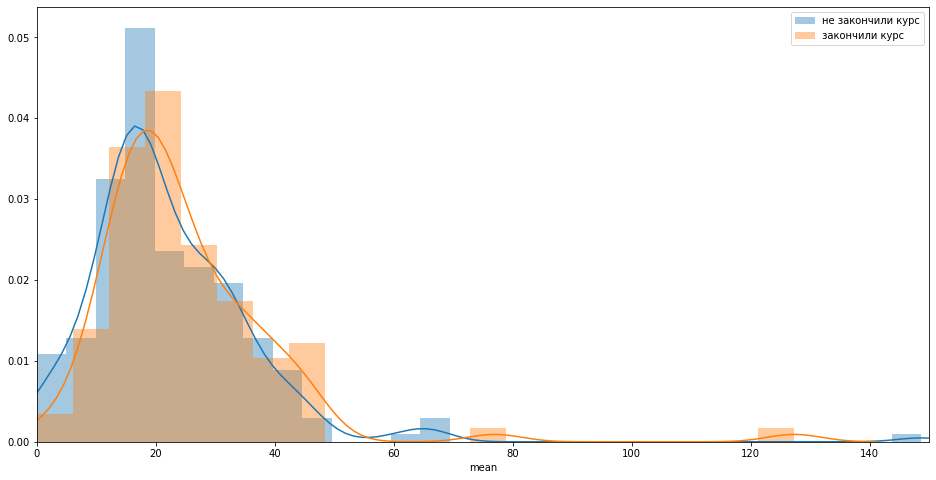

In [21]:
import seaborn as sb

df_0 = df1.loc[df1['is_achieved'] == 0]
df_1 = df1.loc[df1['is_achieved'] == 1]

plt.figure(figsize=(16, 8))
sb.distplot(df_0['hours_diff']['mean'], label = 'не закончили курс')
sb.distplot(df_1['hours_diff']['mean'], label = 'закончили курс')
print('Среднее время ответа')
plt.xlim(0, 150)
plt.legend()
plt.show()

In [46]:
from scipy import stats
print('p-value при проверке гипотезы однородности', stats.ks_2samp(df_0['hours_diff']['mean'], df_1['hours_diff']['mean'])[1])

p-value при проверке гипотезы однородности 0.13788488993191095


90% квантиль


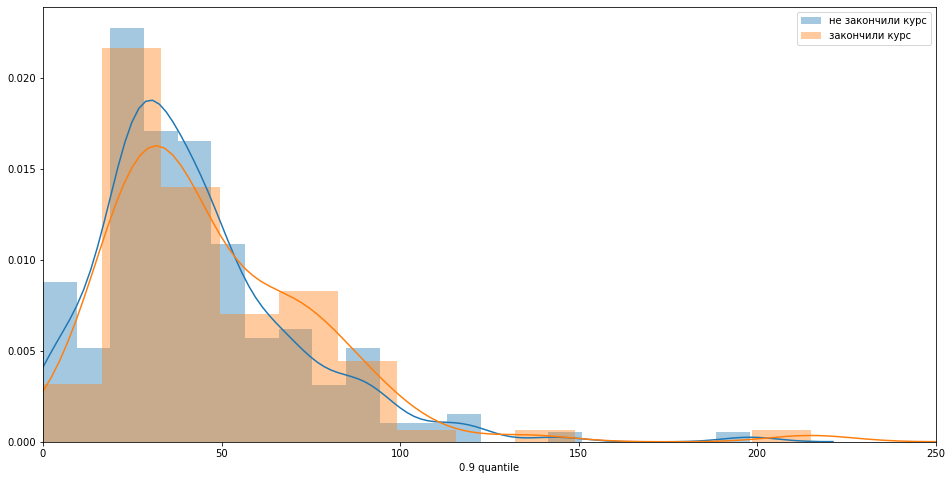

p-value при проверке гипотезы однородности 0.44752792769617744


In [48]:
plt.figure(figsize=(16, 8))
sb.distplot(df_0['hours_diff']['0.9 quantile'], label = 'не закончили курс')
sb.distplot(df_1['hours_diff']['0.9 quantile'], label = 'закончили курс')
print('90% квантиль')
plt.xlim(0, 250)
plt.legend()
plt.show()
print('p-value при проверке гипотезы однородности', stats.ks_2samp(df_0['hours_diff']['0.9 quantile'], df_1['hours_diff']['0.9 quantile'])[1])

Медиана


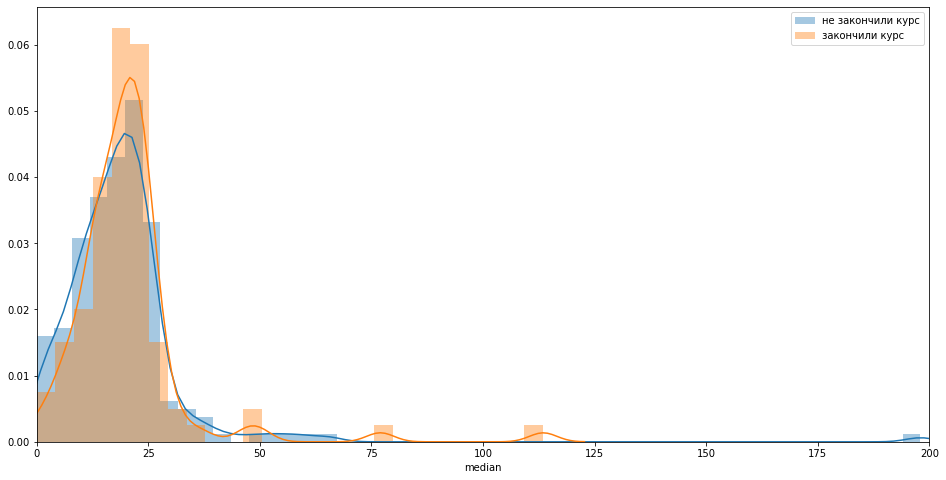

p-value при проверке гипотезы однородности 0.3088910634041141


In [49]:
plt.figure(figsize=(16, 8))
sb.distplot(df_0['hours_diff']['median'], label = 'не закончили курс')
sb.distplot(df_1['hours_diff']['median'], label = 'закончили курс')
print('Медиана')
plt.xlim(0, 200)
plt.legend()
plt.show()
print('p-value при проверке гипотезы однородности', stats.ks_2samp(df_0['hours_diff']['median'], df_1['hours_diff']['median'])[1])

Максимум


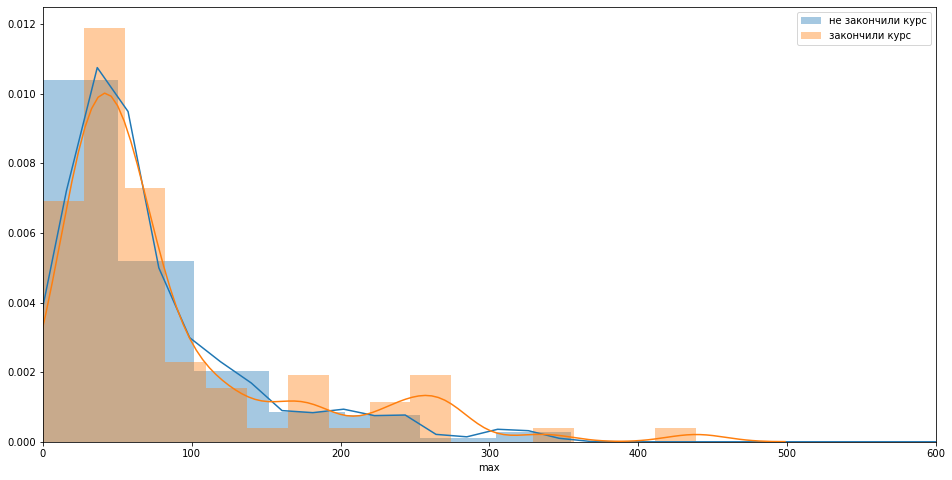

p-value при проверке гипотезы однородности 0.816735734451972


In [50]:
plt.figure(figsize=(16, 8))
sb.distplot(df_0['hours_diff']['max'], label = 'не закончили курс')
sb.distplot(df_1['hours_diff']['max'], label = 'закончили курс')
print('Максимум')
plt.legend()
plt.xlim(0, 600)
plt.show()
print('p-value при проверке гипотезы однородности', stats.ks_2samp(df_0['hours_diff']['max'], df_1['hours_diff']['max'])[1])

Средняя длина ответа ученика


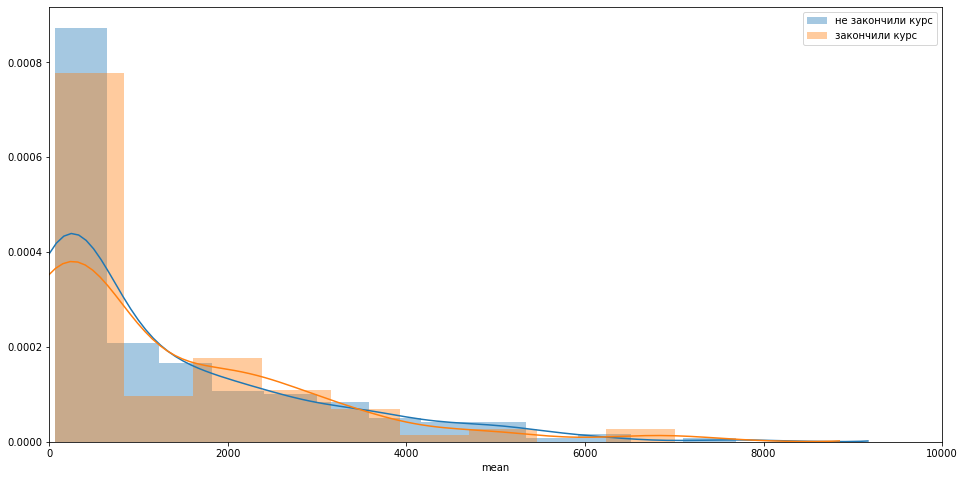

p-value при проверке гипотезы однородности 0.9619796739601859


In [51]:
plt.figure(figsize=(16, 8))
sb.distplot(df_0['size_of_answer']['mean'], label = 'не закончили курс')
sb.distplot(df_1['size_of_answer']['mean'], label = 'закончили курс')
print('Средняя длина ответа ученика')
plt.xlim(0, 10000)
plt.legend()
plt.show()
print('p-value при проверке гипотезы однородности', stats.ks_2samp(df_0['size_of_answer']['mean'], df_1['size_of_answer']['mean'])[1])

Средняя длина ответа преподавателя


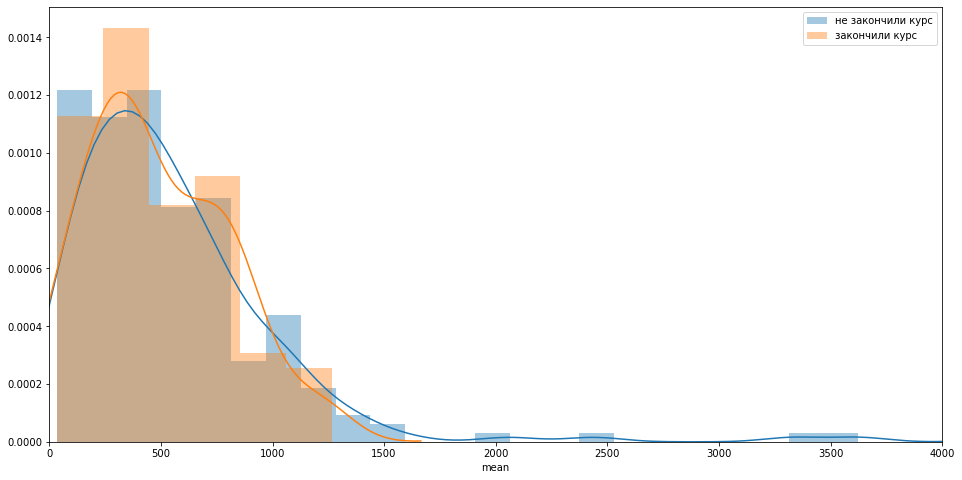

p-value при проверке гипотезы однородности 0.7315457008531747


In [52]:
plt.figure(figsize=(16, 8))
sb.distplot(df_0['size_of_review']['mean'], label = 'не закончили курс')
sb.distplot(df_1['size_of_review']['mean'], label = 'закончили курс')
print('Средняя длина ответа преподавателя')
plt.xlim(0, 4000)
plt.legend()
plt.show()
print('p-value при проверке гипотезы однородности', stats.ks_2samp(df_0['size_of_review']['mean'], df_1['size_of_review']['mean'])[1])

Время ожидания последнего ответа от преподавателя


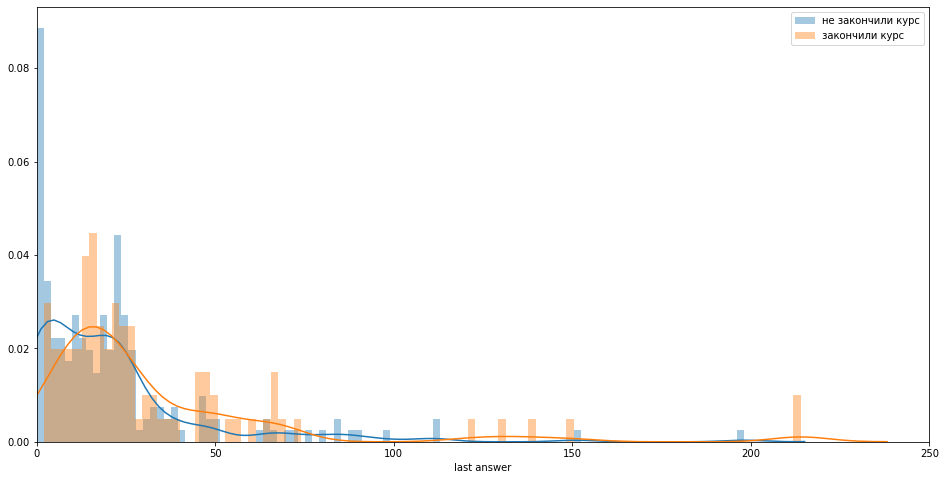

p-value при проверке гипотезы однородности 0.0020606601817242387


In [53]:
plt.figure(figsize=(16, 8))
sb.distplot(df_0['last answer'], bins = 100, label = 'не закончили курс')
sb.distplot(df_1['last answer'], bins = 100, label = 'закончили курс')
print('Время ожидания последнего ответа от преподавателя')
plt.xlim(0, 250)
plt.legend()
plt.show()
print('p-value при проверке гипотезы однородности', stats.ks_2samp(df_0['last answer'], df_1['last answer'])[1])

In [22]:
df = df.sort_values(by = ['user_id','course_element_id', 'tries_count'])
df.head(20)

,hours_diff,size_of_answer,size_of_review,tries_count,review_time,id_from_sl,user_id,course_element_id,is_achieved
7886,21,90,757,1,2020-10-30 10:01:49.865490,19662018,100119700110094008,9550,1
7890,3,339,2366,2,2020-10-29 15:55:07.107728,19662051,100119700110094008,9596,1
7889,1,90,34,3,2020-10-30 11:16:06.411196,19695111,100119700110094008,9596,1
7888,24,5165,34,4,2020-11-05 13:58:59.919919,19944610,100119700110094008,9596,1
7887,22,245,34,5,2020-11-06 13:09:05.437073,19988584,100119700110094008,9596,1
7891,20,1660,34,2,2020-11-07 10:32:47.402121,20026382,100119700110094008,9672,1
7893,26,90,880,1,2020-11-06 17:31:25.637684,19991943,100119700110094008,9676,1
7892,3,745,64,2,2020-11-07 10:09:45.887391,20048207,100119700110094008,9676,1
7895,31,265,920,1,2020-11-19 22:09:33.835248,20386464,100119700110094008,9688,1
7894,15,954,338,3,2020-11-21 10:55:05.033853,20452825,100119700110094008,9688,1


Количество попыток


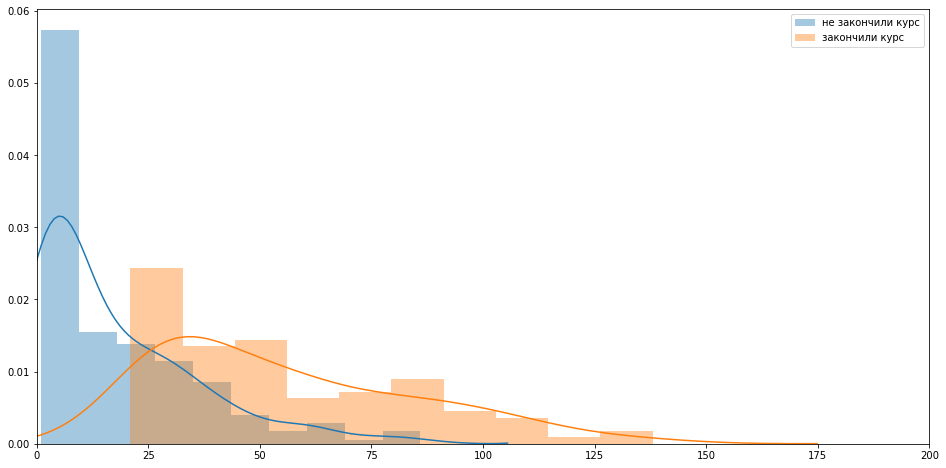

p-value при проверке гипотезы однородности 3.3306690738754696e-16


In [54]:
tr_0 = []
tr_1 = []
t = 0
person = df['user_id'][0]
for i in range(len(df['user_id'])):
    if person == df['user_id'][i]:
        t = t + 1
    else:
        person = df['user_id'][i]
        if df['is_achieved'][i-1] == 0:
            tr_0.append(t)
        else:
            tr_1.append(t)
        t = 1
plt.figure(figsize=(16, 8))
sb.distplot(tr_0, bins = 10, label = 'не закончили курс')
sb.distplot(tr_1, bins = 10, label = 'закончили курс')
print('Количество попыток')
plt.xlim(0, 200)
plt.legend()
plt.show()
print('p-value при проверке гипотезы однородности', stats.ks_2samp(tr_0, tr_1)[1])

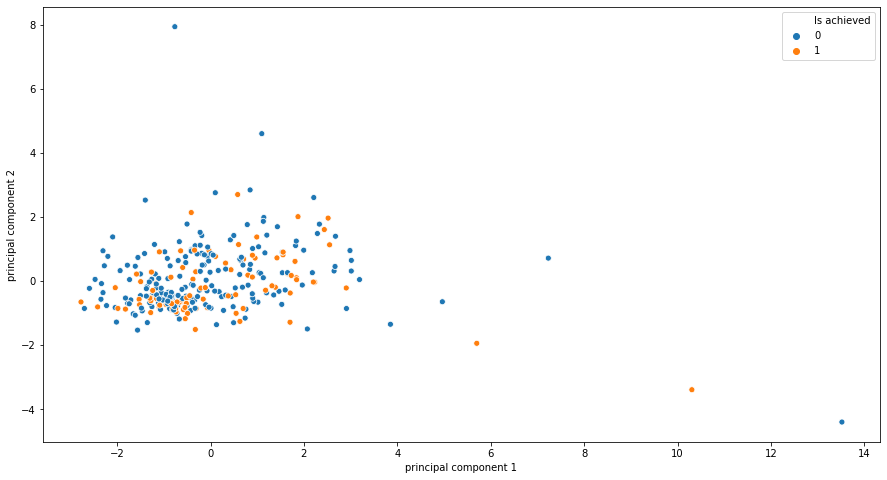

[0.42315452 0.1594127 ]


In [56]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_ = sc.fit_transform(df1.drop(columns=['is_achieved']).values)
pca = PCA(n_components=2, svd_solver='auto')
coords = pca.fit_transform(X_)
finaldf = pd.DataFrame(data = coords, columns = ['principal component 1', 'principal component 2'])
finaldf['Is achieved'] = w
plt.figure(figsize=(15,8))
sb.scatterplot(data=finaldf, x="principal component 1", y="principal component 2", hue="Is achieved")
plt.show()
print(pca.explained_variance_ratio_)